<h1>CI Midterm<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Q1-Simple-Linear-Regression" data-toc-modified-id="Q1-Simple-Linear-Regression-1">Q1 Simple Linear Regression</a></span></li><li><span><a href="#Q2-Fuzzy-Linear-Regression" data-toc-modified-id="Q2-Fuzzy-Linear-Regression-2">Q2 Fuzzy Linear Regression</a></span></li><li><span><a href="#Q3-Support-Vector-Regression" data-toc-modified-id="Q3-Support-Vector-Regression-3">Q3 Support Vector Regression</a></span></li><li><span><a href="#Q4-Single-layer-NN" data-toc-modified-id="Q4-Single-layer-NN-4">Q4 Single-layer NN</a></span><ul class="toc-item"><li><span><a href="#First-two-iterations-illustration" data-toc-modified-id="First-two-iterations-illustration-4.1">First two iterations illustration</a></span></li><li><span><a href="#Code" data-toc-modified-id="Code-4.2">Code</a></span></li></ul></li><li><span><a href="#Q5-Two-layer-NN" data-toc-modified-id="Q5-Two-layer-NN-5">Q5 Two-layer NN</a></span><ul class="toc-item"><li><span><a href="#First-two-iterations-illustration" data-toc-modified-id="First-two-iterations-illustration-5.1">First two iterations illustration</a></span></li><li><span><a href="#Code" data-toc-modified-id="Code-5.2">Code</a></span></li></ul></li><li><span><a href="#Q6-Re-do-Q1-Q5" data-toc-modified-id="Q6-Re-do-Q1-Q5-6">Q6 Re-do Q1-Q5</a></span><ul class="toc-item"><li><span><a href="#Simple-Linear-Regression" data-toc-modified-id="Simple-Linear-Regression-6.1">Simple Linear Regression</a></span></li><li><span><a href="#Fuzzy-Linear-Regression" data-toc-modified-id="Fuzzy-Linear-Regression-6.2">Fuzzy Linear Regression</a></span></li><li><span><a href="#Support-Vector-Regression" data-toc-modified-id="Support-Vector-Regression-6.3">Support Vector Regression</a></span></li><li><span><a href="#Single-layer-NN" data-toc-modified-id="Single-layer-NN-6.4">Single-layer NN</a></span><ul class="toc-item"><li><span><a href="#First-two-iterations-illustration" data-toc-modified-id="First-two-iterations-illustration-6.4.1">First two iterations illustration</a></span></li><li><span><a href="#Code" data-toc-modified-id="Code-6.4.2">Code</a></span></li></ul></li><li><span><a href="#Two-layer-NN" data-toc-modified-id="Two-layer-NN-6.5">Two-layer NN</a></span><ul class="toc-item"><li><span><a href="#First-two-iterations-illustration" data-toc-modified-id="First-two-iterations-illustration-6.5.1">First two iterations illustration</a></span></li><li><span><a href="#Code" data-toc-modified-id="Code-6.5.2">Code</a></span></li></ul></li></ul></li><li><span><a href="#Q7-Discussion" data-toc-modified-id="Q7-Discussion-7">Q7 Discussion</a></span><ul class="toc-item"><li><span><a href="#Discussion-of-Convergence-Issue" data-toc-modified-id="Discussion-of-Convergence-Issue-7.1">Discussion of Convergence Issue</a></span></li></ul></li><li><span><a href="#Q8-Bonus-Question" data-toc-modified-id="Q8-Bonus-Question-8">Q8 Bonus Question</a></span><ul class="toc-item"><li><span><a href="#Simple-Linear-Regression" data-toc-modified-id="Simple-Linear-Regression-8.1">Simple Linear Regression</a></span></li><li><span><a href="#Fuzzy-Linear-Regression" data-toc-modified-id="Fuzzy-Linear-Regression-8.2">Fuzzy Linear Regression</a></span></li><li><span><a href="#Support-Vector-Regression" data-toc-modified-id="Support-Vector-Regression-8.3">Support Vector Regression</a></span></li><li><span><a href="#Single-layer-NN" data-toc-modified-id="Single-layer-NN-8.4">Single-layer NN</a></span></li></ul></li></ul></div>

## Q1 Simple Linear Regression

First, the training data has been visualized as below. 

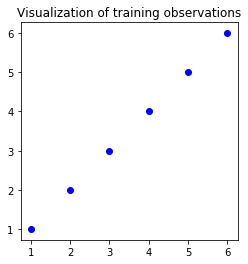

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt

ar = np.array([[1, 1, 1, 1, 1, 1],  # intercept
               [1, 2, 3, 4, 5, 6],  # x
               [1, 2, 3, 4, 5, 6]])  # y

# plot the dot points
plt.scatter(x=ar[1], y=ar[2], c='blue')
plt.title('Visualization of training observations')
plt.axis('scaled')
plt.show()

The data has been processed and the optimization problem (least sum of square) has been formulated. The estimate of $a$ (the slope) is very close to 1 and $b$ (intercept) is very close to 0. The fitted line has been plotted above the training set as well. 


The optimal value of loss is: 2.0532810769192338e-17

The estimated of a (slope) is: 0.9999999990246303 
The estimate of b (intercept) is: 4.218391830290713e-09


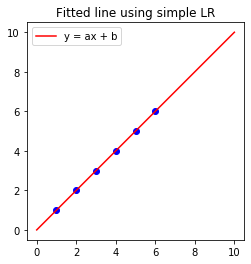

In [2]:
# Data preprocessing
X_lp = ar[[0, 1], :].T  # transpose the array before modeling
y_lp = ar[2].T

# Define and solve the CVXPY problem.
beta = cp.Variable(X_lp.shape[1])  # return num of cols, 2 in total
cost = cp.sum_squares(X_lp * beta - y_lp)  # define cost function
obj = cp.Minimize(cost)  # define objective function
prob = cp.Problem(obj)
prob.solve(solver=cp.CPLEX, verbose=False)
# print("status:", prob.status)
print("\nThe optimal value of loss is:", prob.value)
print("\nThe estimated of a (slope) is:", beta.value[1],
      "\nThe estimate of b (intercept) is:", beta.value[0])

x = np.linspace(0, 10, 100)
y = beta.value[1] * x + beta.value[0]
plt.close('all')
plt.plot(x, y, c='red', label='y = ax + b')
plt.title('Fitted line using simple LR')
plt.legend(loc='upper left')
plt.scatter(x=ar[1], y=ar[2], c='blue')
plt.axis('scaled')
plt.show()

## Q2 Fuzzy Linear Regression

Same as HW2, the optimization problem has been formulated as below. Here I pick the threshold $\alpha$ as $0.5$ for spread calculation. Similar to Q1, The estimate of $A_1$ (the slope) is 1 and $A_0$ (intercept) is 0. The spread of $A_1$ and $A_0$ have both been calculated. As expected, both spreads are 0 since the regression line fits perfectly to the training data and there is no need of spreads to cover any errors between the estimate $\hat{y}$ and the true values $y$.  

The fitted line has been plotted above the training set as well.


The optimal value of loss is: 0.0

The center of A1 (slope) is: 1.0 
The spread of A1 (slope) is: 0.0 
The center of A0 (intercept) is: 0.0 
The spread of A0 (intercept) is: 0.0


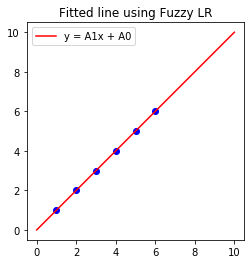

In [3]:
# Define threshold h (it has same meaning as the alpha in alpha-cut). Higher the h, wider the spread.
h = 0.5
# Define and solve the CVXPY problem.
c = cp.Variable(X_lp.shape[1])  # for spread variables, A0 and A1
alpha = cp.Variable(X_lp.shape[1])  # for center/core variables, A0 and A1
cost = cp.sum(X_lp * c)  # define cost function
obj = cp.Minimize(cost)  # define objective function
constraints = [c >= 0,
               y_lp <= (1 - h) * abs(X_lp) * c + X_lp * alpha,  # abs operate on each elements of X_lp
               -y_lp <= (1 - h) * abs(X_lp) * c - X_lp * alpha]

prob = cp.Problem(obj, constraints)
prob.solve(solver=cp.CPLEX, verbose=False)
# print("status:", prob.status)
print("\nThe optimal value of loss is:", prob.value)
print("\nThe center of A1 (slope) is:", alpha.value[1],
      "\nThe spread of A1 (slope) is:", c.value[1],
      "\nThe center of A0 (intercept) is:", alpha.value[0],
      "\nThe spread of A0 (intercept) is:", c.value[0])

x = np.linspace(0, 10, 100)
y = alpha.value[1] * x + alpha.value[0]
plt.close('all')
plt.plot(x, y, c='red', label='y = A1x + A0')
plt.title('Fitted line using Fuzzy LR')
plt.legend(loc='upper left')
plt.scatter(x=ar[1], y=ar[2], c='blue')
plt.axis('scaled')
plt.show()

## Q3 Support Vector Regression

In the course lecture, it was mentioned that the objective function of SVR is to ***minimize the sum of squares plus seek for flatness of the hyperplane.*** In $\epsilon$-SV regression, our goal is to find a function $f(x)$ that has at most $\epsilon$ deviation from the actually obtained targets $y_i$ for all the training data, and at the same time is as flat as possible. Flatness in the case means that one seeks a small $w$ and the approach here is to minimize the L2-norm. The problem can be written as a convex optimization problem:

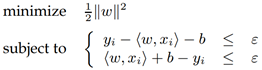

Sometimes the convex optimization problem does not render feasible solution. We also may want to allow for some errors. Similarly to the loss function of “soft margin” in SVM, we introduce slack variables $ξ_i$, $ξ_i^*$ to cope with otherwise infeasible constraints of the optimization problem:

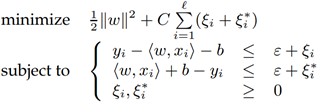

Here the constent $C$ should be $>0$ and determines the trade-off between the flatness of $f(x)$ and the amount up to which deviations larger than $\epsilon$ are tolerated. The optimization problem is formulated with slack variables and in the program below, I defined $C$ as $\frac{1}{N}$ where $N=6$ is the # of observations in the training set. The $\epsilon$ here has been set to 0. 

From the output below, the estimated $w$ is very close to 1 and $b$ is very close to 0. 

In [5]:
# The constant C, defines the trade-off between the flatness of f and the amount up to which deviations larger than ε are tolerated.
# When C gets bigger, the margin get softer. Here C is defined as 1/N. N is the # of observations.
C = 1 / len(ar[1])
epsilon = 0  # For this ε-SVR problem set ε=0
# Define and solve the CVXPY problem.
bw = cp.Variable(X_lp.shape[1])  # for b and w parameters in SVR. bw[0]=b, bw[1]=w
epsilon1 = cp.Variable(X_lp.shape[0])  # for slack variables ξi
epsilon2 = cp.Variable(X_lp.shape[0])  # for slack variables ξ*i
cost = 1 / 2 * bw[1] ** 2 + C * cp.sum(epsilon1 + epsilon2)  # define cost function
obj = cp.Minimize(cost)  # define objective function
constraints = [epsilon1 >= 0,
               epsilon2 >= 0,
               y_lp <= X_lp * bw + epsilon + epsilon1,
               -y_lp <= -(X_lp * bw) + epsilon + epsilon2]

prob = cp.Problem(obj, constraints)
prob.solve(solver=cp.CPLEX, verbose=False)
# print("status:", prob.status)
print("\nThe estimate of w is:", bw.value[1],
      "\nThe estimate of b is:", bw.value[0], )


The estimate of w is: 0.9999999970629421 
The estimate of b is: 9.380686338580135e-09


The fitted line has been plotted above the training set as well:

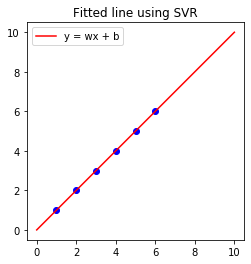

In [6]:
x = np.linspace(0, 10, 100)
y = bw.value[1] * x + bw.value[0]
plt.close('all')
plt.plot(x, y, c='red', label='y = wx + b')
plt.title('Fitted line using SVR')
plt.legend(loc='upper left')
plt.scatter(x=ar[1], y=ar[2], c='blue')
plt.axis('scaled')
plt.show()

## Q4 Single-layer NN

### First two iterations illustration

From the NN archiecture on Lecture 7 page 13, the network output $a$ can be denoted as:

$$a=f(x)=f(wp+b)$$
where
$$x=wp+b\quad f(x)=5x\quad \frac{\partial f}{\partial x}=5$$
Since $b=1$,
$$a=f(x)=f(wp+b)=5(wp+1)$$

Set the loss function $E$ as:
$$ E=\sum_{i=1}^N \frac{1}{2}(T_i-a_i)^2 $$
where $T_i$ is the target value for each input $i$ and $N$ is the number of observations in the training set. 

We can find the gradient for $w$ by:

$$\frac{\partial E}{\partial w}=\frac{\partial E}{\partial a}\frac{\partial a}{\partial x}\frac{\partial x}{\partial w}$$

**For the 1st iteration**, with initial value $w=10$:

$$
\frac{\partial E}{\partial a}=a-T=5(wp_i+1)-T_i\\
\frac{\partial f}{\partial x}=5$$
$$\frac{\partial x_1}{\partial w}=p_1=1$$
$$\vdots$$
$$\frac{\partial x_6}{\partial w}=p_6=6$$

For $i=1$,
$$
\frac{\partial E}{\partial a}=a_i-T_i=5(wp_i+1)-T_i=5(10*1+1)-1=54\\
\frac{\partial E}{\partial w}=54*5*1$$
For $i=2$,
$$
\frac{\partial E}{\partial a}=a_i-T_i=5(wp_i+1)-T_i=5(10*2+1)-2=103\\
\frac{\partial E}{\partial w}=103*5*2$$
For $i=3$,
$$
\frac{\partial E}{\partial a}=a_i-T_i=5(wp_i+1)-T_i=5(10*3+1)-3=152\\
\frac{\partial E}{\partial w}=152*5*3$$
For $i=4$,
$$
\frac{\partial E}{\partial a}=a_i-T_i=5(wp_i+1)-T_i=5(10*4+1)-4=201\\
\frac{\partial E}{\partial w}=201*5*4$$
For $i=5$,
$$
\frac{\partial E}{\partial a}=a_i-T_i=5(wp_i+1)-T_i=5(10*5+1)-5=250\\
\frac{\partial E}{\partial w}=250*5*5$$
For $i=6$,
$$
\frac{\partial E}{\partial a}=a_i-T_i=5(wp_i+1)-T_i=5(10*6+1)-6=299\\
\frac{\partial E}{\partial w}=299*5*6$$

The sum of gradient for the batch training is:
$$\sum_{i}(\frac{\partial E}{\partial w})=(54*1+103*2+152*3+201*4+250*5+299*6)*5=22820
$$
Average the sum of gradient by $N=6$ and the step size (learning rate=0.1) can be calculated as:
$$s_1=0.1*\frac{\sum_{i}(\frac{\partial E}{\partial w})}{N}=380.333
$$.

The new $w$ and output $a$ is calculated:
$$w=10-380.333=-370.333\\
a=[-1846.667,-3698.333,-5550,-7401.667,-9253.333, -11105]
$$

**For the 2nd iteration:**

For $i=1$,
$$
\frac{\partial E}{\partial a}=a_i-T_i=5(wp_i+1)-T_i=5(-370.333*1+1)-1=-1847.667\\
\frac{\partial E}{\partial w}=-1847.667*5*1$$
For $i=2$,
$$
\frac{\partial E}{\partial a}=a_i-T_i=5(wp_i+1)-T_i=5(-370.333*2+1)-2=-3700.333\\
\frac{\partial E}{\partial w}=-3700.333*5*2$$
For $i=3$,
$$
\frac{\partial E}{\partial a}=a_i-T_i=5(wp_i+1)-T_i=5(-370.333*3+1)-3=-5553\\
\frac{\partial E}{\partial w}=-5553*5*3$$
For $i=4$,
$$
\frac{\partial E}{\partial a}=a_i-T_i=5(wp_i+1)-T_i=5(-370.333*4+1)-4=-7405.667\\
\frac{\partial E}{\partial w}=-7405.667*5*4$$
For $i=5$,
$$
\frac{\partial E}{\partial a}=a_i-T_i=5(wp_i+1)-T_i=5(-370.333*5+1)-5=-9258.333\\
\frac{\partial E}{\partial w}=-9258.333*5*5$$
For $i=6$,
$$
\frac{\partial E}{\partial a}=a_i-T_i=5(wp_i+1)-T_i=5(-370.333*6+1)-6=-11111\\
\frac{\partial E}{\partial w}=-11111*5*6$$

The sum of gradient for the batch training is:
$$\sum_{i}(\frac{\partial E}{\partial w})=(-1847.667*1+-3700.333*2+-5553*3+-7405.667*4+-9258.333*5+-11111*6)*5=-842438.333
$$
Average the sum of gradient by $N=6$ and the step size (learning rate=0.1) can be calculated as:
$$s_1=0.1*\frac{\sum_{i}(\frac{\partial E}{\partial w})}{N}=-14040.639
$$.

The new $w$ and output $a$ is calculated:
$$w=-370.333-(-14040.638)=-13670.305\\
a=[68356.528, 136708.056, 205059.583, 273411.111, 341762.639, 410114.167]
$$

### Code

**We can tell from the above that throughout the first 2 iterations, the updated fit $a$ more and more far away from the actual value. This is because of the learning rate=0.1 was set to be too large and cause the result to be oscillating and won't be able to converge.** Further discussion has been made in Q7 to explore for a proper learning rate in this case. 

From the code below, after 30 iterations the loss function value becomes larger and larger and won't be able to converge, which further proves the findings. 

In [4]:
def single_layer_NN(lr, w, maxiteration):
    """lr - learning rate\n
    w - initial value of w\n
    maxiteration - define # of max iteration """
    E0 = sum(0.5 * np.power((y_lp - 5 * (w * X_lp[:, 1] + 1)), 2))  # initialize Loss, before 1st iteration
    for i in range(maxiteration):
        if i > 0:  # Starting 2nd iteration, E1 value give to E0
            E0 = E1  # Loss before iteration
        print("Iteration=", i, ",", "Loss value=", E0)
        gradient = np.mean((5 * (w * X_lp[:, 1] + 1) - y_lp) * 5 * X_lp[:, 1])  # calculate gradient
        step = gradient * lr  # calculate step size
        w = w - step  # refresh the weight
        E1 = sum(0.5 * np.power((5 * (w * X_lp[:, 1] + 1) - y_lp), 2))  # Loss after iteration
        a = 5 * (w * X_lp[:, 1] + 1) # the refreshed output

        if abs(E0 - E1) <= 0.0001:
            print('Break out of the loop and end at Iteration=', i,
                  '\nThe value of loss is:', E1,
                  '\nThe value of w is:', w)
            break
    return w, a, gradient

w, a, gradient = single_layer_NN(lr=0.1, w=10, maxiteration=30)

Iteration= 0 , Loss value= 114465.5
Iteration= 1 , Loss value= 155978551.88888893
Iteration= 2 , Loss value= 212573833341.70184
Iteration= 3 , Loss value= 289704182060049.94
Iteration= 4 , Loss value= 3.948205279520827e+17
Iteration= 5 , Loss value= 5.3807731798658535e+20
Iteration= 6 , Loss value= 7.333134415107596e+23
Iteration= 7 , Loss value= 9.993890943267017e+26
Iteration= 8 , Loss value= 1.3620077109202842e+30
Iteration= 9 , Loss value= 1.8561989670860753e+33
Iteration= 10 , Loss value= 2.5297027159144115e+36
Iteration= 11 , Loss value= 3.4475807520519955e+39
Iteration= 12 , Loss value= 4.6985019097878616e+42
Iteration= 13 , Loss value= 6.403307647874708e+45
Iteration= 14 , Loss value= 8.726685573526139e+48
Iteration= 15 , Loss value= 1.1893078591103693e+52
Iteration= 16 , Loss value= 1.6208366530732709e+55
Iteration= 17 , Loss value= 2.2089414745067798e+58
Iteration= 18 , Loss value= 3.010434412711674e+61
Iteration= 19 , Loss value= 4.10274127125176e+64
Iteration= 20 , Loss val

## Q5 Two-layer NN

### First two iterations illustration

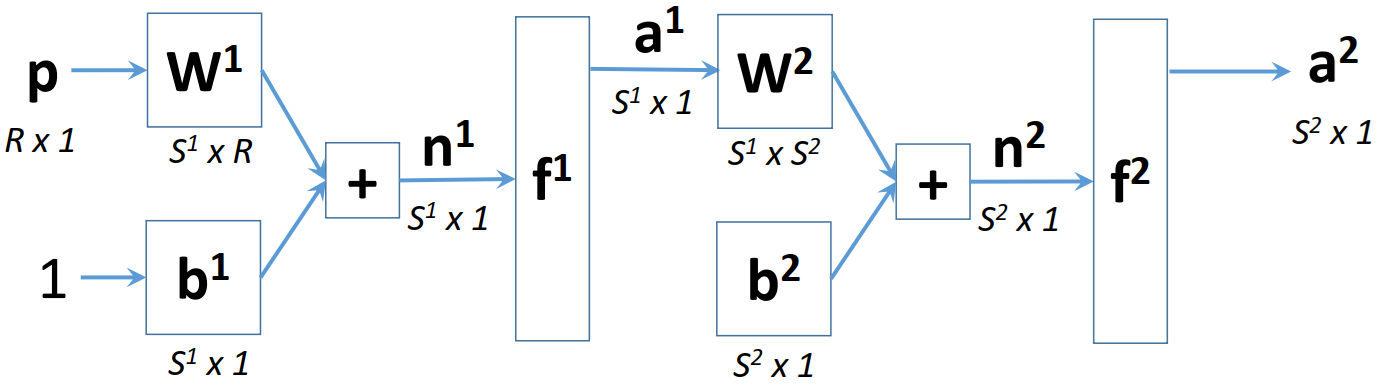

The above structure will be used to model Q5, with $b_1=b_2=1$ and initial values $w_1=w_2=1$. For $f_1$, the activation function is sigmoid activation function. Since the sample data implies linear relationship, for $f_2$, a linear activation function (specifically, an **identify activation function**) has been chosen. The loss function $E$ has been the same as Q4:
$$
E=\sum_{i=1}^N \frac{1}{2}(T_i-a_2)^2
$$
where $T_i$ is the target value for each input $i$ and $N$ is the number of observations in the training set. 

The output $a_1$ and $a_2$ can be denoted as:
$$
a_1=f_1(w_1p+b) \quad a_2=f_2(w_2a_1+b)
$$
where
$$
f_1(x)=\frac{1}{1+e^{-x}} \quad \frac{\partial f_1}{\partial x}=f_1(1-f_1)\\
and \quad f_2(x)=x \quad \frac{\partial f_2}{\partial x}=1
$$

We can find the gradient for $w_1$ and $w_2$ by:

$$
\frac{\partial E}{\partial w_2}=\frac{\partial E}{\partial a_2}\frac{\partial a_2}{\partial n_2}\frac{\partial n_2}{\partial w_2}=(w_2a_1+b-T)*1*a_1=(w_2a_1+1-T)a_1
\\
\frac{\partial E}{\partial w_1}=\frac{\partial E}{\partial a_2}\frac{\partial a_2}{\partial a_1}\frac{\partial a_1}{\partial n_1}\frac{\partial n_1}{\partial w_1}=(w_2a_1+b-T)*w_2*a_1(1-a_1)*p\\=\frac{\partial E}{\partial w_2}*w_2*(1-a_1)*p
$$
where
$$
a_1=f_1(w_1p+b)=\frac{1}{1+e^{-(w_1p+1)}}
$$

**We can see that the gradient of $w_1$ can be calculated from the gradient of $w_2$ and the gradient of both weights ($w_1$ and $w_2$) only relate to the input and the initial values of the weights!**

**For the 1st iteration**, 

$$
For\quad i=1, 2, 3, 4, 5, 6, \quad a_1=\frac{1}{1+e^{-(w_1p_i+1)}}\approx1\\
$$

For $i=1:$
$$
\frac{\partial E}{\partial a_2}=a_2-T_i=(w_2a_1+1)-T_i=(10*1+1)-1=10\\
\frac{\partial E}{\partial w_2}=10*1*1=10,\quad \frac{\partial E}{\partial w_1}=10*10*(1-1)*1=0
$$
For $i=2:$
$$
\frac{\partial E}{\partial a_2}=a_2-T_i=(w_2a_1+1)-T_i=(10*1+1)-2=9\\
\frac{\partial E}{\partial w_2}=9*1*1=9,\quad \frac{\partial E}{\partial w_1}=9*10*(1-1)*1=0
$$
For $i=3:$
$$
\frac{\partial E}{\partial a_2}=a_2-T_i=(w_2a_1+1)-T_i=(10*1+1)-3=8\\
\frac{\partial E}{\partial w_2}=8*1*1=8,\quad \frac{\partial E}{\partial w_1}=8*10*(1-1)*1=0
$$
For $i=4:$
$$
\frac{\partial E}{\partial a_2}=a_2-T_i=(w_2a_1+1)-T_i=(10*1+1)-4=7\\
\frac{\partial E}{\partial w_2}=7*1*1=7,\quad \frac{\partial E}{\partial w_1}=7*10*(1-1)*1=0
$$
For $i=5:$
$$
\frac{\partial E}{\partial a_2}=a_2-T_i=(w_2a_1+1)-T_i=(10*1+1)-5=6\\
\frac{\partial E}{\partial w_2}=6*1*1=6,\quad \frac{\partial E}{\partial w_1}=6*10*(1-1)*1=0
$$
For $i=6:$
$$
\frac{\partial E}{\partial a_2}=a_2-T_i=(w_2a_1+1)-T_i=(10*1+1)-6=5\\
\frac{\partial E}{\partial w_2}=5*1*1=5,\quad \frac{\partial E}{\partial w_1}=5*10*(1-1)*1=0
$$

The sum of gradient for the batch training is:
$$\sum_{i}(\frac{\partial E}{\partial w_1})=0$$
$$\sum_{i}(\frac{\partial E}{\partial w_2})=10+9+8+7+6+5=45$$
Average the sum of gradient by $N=6$ and the step size (learning rate=0.1) can be calculated as:
$$s_1=0.1*\frac{\sum_{i}(\frac{\partial E}{\partial w_1})}{N}=0$$

$$s_2=0.1*\frac{\sum_{i}(\frac{\partial E}{\partial w_2})}{N}=0.75$$

The new weight $w_1$, $w_2$ and output $a_1$ and $a_2$ can be calculated. The value of $a_1$ and $a_2$ are both for all 6 observations. 
$$
w_1=w_1-s_1=10-0=10,\\
w_2=w_2-s_2=10-0.75=9.25\\
a_1=\frac{1}{1+e^{-(w_1p_i+1)}}\approx1, \quad i\in [1,2,3,4,5,6]\\
a_2=w_2a_1+b=9.25*1+1=10.25
$$

**For the 2nd iteration**, 

$$
For\quad i=1, 2, 3, 4, 5, 6, \quad a_1=\frac{1}{1+e^{-(w_1p_i+1)}}\approx1\\
$$

For $i=1:$
$$
\frac{\partial E}{\partial a_2}=a_2-T_i=(w_2a_1+1)-T_i=(9.25*1+1)-1=9.25\\
\frac{\partial E}{\partial w_2}=9.25*1*1=9.25,\quad \frac{\partial E}{\partial w_1}=9.25*9.25*(1-1)*1=0
$$
For $i=2:$
$$
\frac{\partial E}{\partial a_2}=a_2-T_i=(w_2a_1+1)-T_i=(9.25*1+1)-2=8.25\\
\frac{\partial E}{\partial w_2}=8.25*1*1=8.25,\quad \frac{\partial E}{\partial w_1}=8.25*9.25*(1-1)*1=0
$$
For $i=3:$
$$
\frac{\partial E}{\partial a_2}=a_2-T_i=(w_2a_1+1)-T_i=(9.25*1+1)-3=7.25\\
\frac{\partial E}{\partial w_2}=7.25*1*1=7.25,\quad \frac{\partial E}{\partial w_1}=7.25*9.25*(1-1)*1=0
$$
For $i=4:$
$$
\frac{\partial E}{\partial a_2}=a_2-T_i=(w_2a_1+1)-T_i=(9.25*1+1)-4=6.25\\
\frac{\partial E}{\partial w_2}=6.25*1*1=6.25,\quad \frac{\partial E}{\partial w_1}=6.25*9.25*(1-1)*1=0
$$
For $i=5:$
$$
\frac{\partial E}{\partial a_2}=a_2-T_i=(w_2a_1+1)-T_i=(9.25*1+1)-5=5.25\\
\frac{\partial E}{\partial w_2}=5.25*1*1=5.25,\quad \frac{\partial E}{\partial w_1}=5.25*9.25*(1-1)*1=0
$$
For $i=6:$
$$
\frac{\partial E}{\partial a_2}=a_2-T_i=(w_2a_1+1)-T_i=(9.25*1+1)-6=4.25\\
\frac{\partial E}{\partial w_2}=4.25*1*1=4.25,\quad \frac{\partial E}{\partial w_1}=4.25*9.25*(1-1)*1=0
$$

The sum of gradient for the batch training is:
$$\sum_{i}(\frac{\partial E}{\partial w_1})=0$$
$$\sum_{i}(\frac{\partial E}{\partial w_2})=9.25+8.25+7.25+6.25+5.25+4.25=40.5$$
Average the sum of gradient by $N=6$ and the step size (learning rate=0.1) can be calculated as:
$$s_1=0.1*\frac{\sum_{i}(\frac{\partial E}{\partial w_1})}{N}=0$$

$$s_2=0.1*\frac{\sum_{i}(\frac{\partial E}{\partial w_2})}{N}=0.675$$
The new weight $w_1$, $w_2$ and output $a_1$ and $a_2$ can be calculated, The value of $a_1$ and $a_2$ are both for all 6 observations:
$$
w_1=w_1-s_1=10-0=10,\\
w_2=w_2-s_2=9.25-0.675=8.575\\
a_1=\frac{1}{1+e^{-(w_1p_i+1)}}\approx1, \quad i\in [1,2,3,4,5,6]\\
a_2=w_2a_1+b=8.575*1+1=9.575
$$

### Code

Below is the code to estimate all weights using batch training, with the stopping criteria as change in loss function less than 0.0001. We can tell the iteration stopped at Iteration 62 and $w_1=10$ while $w_2=2.511$. We can tell that the $w_1$ hardly changes throughout the iterations. I did not show the first 60 iteration results since it makes the report wordy. 

In [5]:
def linear_activation_NN(C, lr, w1, w2, maxiteration):
    # C - set the slope of the f2: f2(x)=Cx
    # lr - learning rate
    # w1 - initial value of w1
    # w2 - initial value of w2
    # maxiteration - define # of max iteration
    a1 = 1 / (1 + np.exp(-(w1 * X_lp[:, 1] + 1)))  # initialize output1 - a1
    a2 = C * (w2 * a1 + 1)  # initialize output2 - a2
    E0 = sum(0.5 * np.power(y_lp - a2, 2))  # initialize Loss, before 1st iteration
    for i in range(maxiteration):
        if i > 0:  # Starting 2nd iteration, E1 value will give to E0
            E0 = E1  # Loss before iteration
        # print("Iteration=", i, ",", "Loss value=", E0)
        gradient_2 = np.mean((w2 * a1 + 1 - y_lp) * C * a1)  # calculate gradient for w2
        gradient_1 = np.mean(
            (w2 * a1 + 1 - y_lp) * C * w2 * a1 * (1 - a1) * X_lp[:, 1])  # use BP to calculate gradient for w1
        # gradient_1 = np.mean(gradient_2 * w2 * (1 - a1) * X_lp[:, 1])
        step_1 = gradient_1 * lr  # calculate step size
        step_2 = gradient_2 * lr
        w1 = w1 - step_1  # refresh w1
        w2 = w2 - step_2  # refresh w2
        a1 = 1 / (1 + np.exp(-(w1 * X_lp[:, 1] + 1)))  # refresh a1
        a2 = C * (w2 * a1 + 1)  # refresh a2
        E1 = sum(0.5 * np.power(y_lp - a2, 2))  # Loss after iteration

        if abs(E0 - E1) <= 0.0001:
            print('Break out of the loop and the iteration converge at Iteration=', i,
                  '\nThe value of loss is:', E1,
                  '\nThe value of w1 is:', w1,
                  '\nThe value of w2 is:', w2)
            break
    return w1, w2, a1, a2, gradient_1, gradient_2

w1, w2, a1, a2, gradient_1, gradient_2 = linear_activation_NN(C=1, lr=0.1, w1=10, w2=10, maxiteration=100)

Break out of the loop and the iteration converge at Iteration= 61 
The value of loss is: 8.75025313893184 
The value of w1 is: 9.999705441446167 
The value of w2 is: 2.5109311582607736


Below gives a plot on how the NN model fit to the current sample data points. 

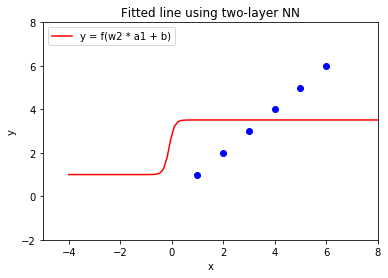

In [6]:
# plot the fit
x = np.linspace(-4, 10, 100)
y = w2 * (1 / (1 + np.exp(-(w1 * x + 1)))) + 1
# plt.close('all')
plt.plot(x, y, c='red', label='y = f(w2 * a1 + b)')
plt.title('Fitted line using two-layer NN')
plt.legend(loc='upper left')
plt.scatter(x=ar[1], y=ar[2], c='blue')
plt.xlim((-5, 8))
plt.ylim((-2, 8))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Q6 Re-do Q1-Q5

Two additional observations, (2, 3) and (3, 4) are added and below is the scatterplot showing how the data sample looks like. 

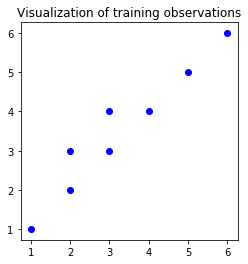

In [7]:
ar = np.array([[1, 1, 1, 1, 1, 1, 1, 1],  # intercept
               [1, 2, 3, 4, 5, 6, 2, 3],  # x
               [1, 2, 3, 4, 5, 6, 3, 4]])  # y

# plot the dot points
plt.scatter(x=ar[1], y=ar[2], c='blue')
plt.title('Visualization of training observations')
plt.axis('scaled')
plt.show()

### Simple Linear Regression

The simple linear regression fit similar to Q1 has been conducted as below. The estimated $slope=0.923$ and estimated $intercept=0.5$.

In [8]:
# Data preprocessing
X_lp = ar[[0, 1], :].T  # transpose the array before modeling
y_lp = ar[2].T

# Define and solve the CVXPY problem.
beta = cp.Variable(X_lp.shape[1])  # return num of cols, 2 in total
cost = cp.sum_squares(X_lp * beta - y_lp)  # define cost function
obj = cp.Minimize(cost)  # define objective function
prob = cp.Problem(obj)
prob.solve(solver=cp.CPLEX, verbose=False)
# print("status:", prob.status)
print("\nThe optimal value of loss is:", prob.value)
print("\nThe estimated of a (slope) is:", beta.value[1],
      "\nThe estimate of b (intercept) is:", beta.value[0])


The optimal value of loss is: 1.3846153846153055

The estimated of a (slope) is: 0.9230769232893655 
The estimate of b (intercept) is: 0.4999999991534938


The regression line has been plotted:

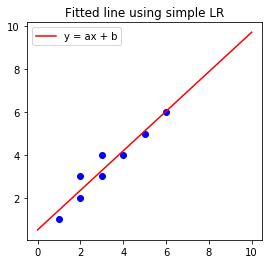

In [9]:
# Plot the fit
x = np.linspace(0, 10, 100)
y = beta.value[1] * x + beta.value[0]
plt.close('all')
plt.plot(x, y, c='red', label='y = ax + b')
plt.title('Fitted line using simple LR')
plt.legend(loc='upper left')
plt.scatter(x=ar[1], y=ar[2], c='blue')
plt.axis('scaled')
plt.show()

### Fuzzy Linear Regression

The fuzzy linear regression fit similar to Q2 has been conducted as below. We can see that some spread was estimated for the intercept $A0$ because we are unable to fit the data perfectly this time and there will have to be some spread to cover the data points around the regression line. 

In [10]:
# Define threshold h (it has same meaning as the alpha in alpha-cut). Higher the h, wider the spread.
h = 0.5
# Define and solve the CVXPY problem.
c = cp.Variable(X_lp.shape[1])  # for spread variables, A0 and A1
alpha = cp.Variable(X_lp.shape[1])  # for center/core variables, A0 and A1
cost = cp.sum(X_lp * c)  # define cost function
obj = cp.Minimize(cost)  # define objective function
constraints = [c >= 0,
               y_lp <= (1 - h) * abs(X_lp) * c + X_lp * alpha,  # abs operate on each elements of X_lp
               -y_lp <= (1 - h) * abs(X_lp) * c - X_lp * alpha]

prob = cp.Problem(obj, constraints)
prob.solve(solver=cp.CPLEX, verbose=False)
# print("status:", prob.status)
print("\nThe optimal value of loss is:", prob.value)
print("\nThe center of A1 (slope) is:", alpha.value[1],
      "\nThe spread of A1 (slope) is:", c.value[1],
      "\nThe center of A0 (intercept) is:", alpha.value[0],
      "\nThe spread of A0 (intercept) is:", c.value[0])


The optimal value of loss is: 8.0

The center of A1 (slope) is: 0.9999999999999999 
The spread of A1 (slope) is: 0.0 
The center of A0 (intercept) is: 0.5 
The spread of A0 (intercept) is: 1.0


The regression line has been plotted, along with the fuzzy spread. 

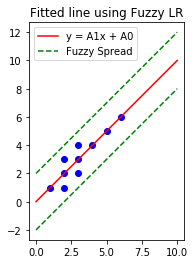

In [20]:
x = np.linspace(0, 10, 100)
y = alpha.value[1] * x + alpha.value[0]
plt.close('all')
plt.plot(x, y, c='red', label='y = A1x + A0')
y = (alpha.value[1] + c.value[1]) * x + alpha.value[0] + c.value[0]
plt.plot(x, y, '--g', label='Fuzzy Spread')
y = (alpha.value[1] - c.value[1]) * x + alpha.value[0] - c.value[0]
plt.plot(x, y, '--g')
plt.title('Fitted line using Fuzzy LR')
plt.legend(loc='upper left')
plt.scatter(x=ar[1], y=ar[2], c='blue')
plt.axis('scaled')
plt.show()

### Support Vector Regression

The support vector regression fit similar to Q3 has been conducted as below. Here a simpler version of SVR is used with $\epsilon$ has been set to 1:
$$
minimize \quad \frac{1}{2}||w||^2$$

$$
subject\, to=\left\{
\begin{aligned}
y_i-(w \cdot x_i)-b\le\epsilon\\
(w \cdot x_i)-b\le\epsilon-y_i\le\epsilon\\
\end{aligned}
\right.
$$

The fitted line and the hard margin has been plotted above the training set as well. The estimated $w=0.6$ and $b=1.4$.


The estimate of w is: 0.6000000017139642 
The estimate of b is: 1.3999999940011307


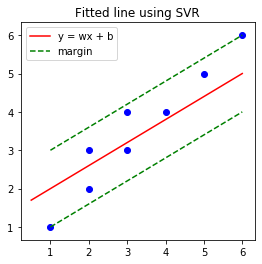

In [17]:
# A simplified version without introducing the slack variables ξi and ξ*i
epsilon = 1
bw = cp.Variable(X_lp.shape[1])  # for b and w parameters in SVR. bw[0]=b, bw[1]=w
cost = 1 / 2 * bw[1] ** 2
obj = cp.Minimize(cost)
constraints = [
    y_lp <= X_lp * bw + epsilon,
    -y_lp <= -(X_lp * bw) + epsilon]
prob = cp.Problem(obj, constraints)
prob.solve(solver=cp.CPLEX, verbose=False)
# print("status:", prob.status)
print("\nThe estimate of w is:", bw.value[1],
      "\nThe estimate of b is:", bw.value[0], )

upper = X_lp[:, 1] * bw.value[1] + bw.value[0] + epsilon # upper bound of the margin
lower = X_lp[:, 1] * bw.value[1] + bw.value[0] - epsilon # lower bound of the margin
plt.close('all')
x = np.linspace(.5, 6, 100)
y = bw.value[1] * x + bw.value[0]
plt.plot(x, y, c='red', label='y = wx + b')
x = [[min(X_lp[:, 1]), max(X_lp[:, 1])]]
y = [[min(lower), max(lower)]]
for i in range(len(x)):
    plt.plot(x[i], y[i], '--g')
y = [[min(upper), max(upper)]]
for i in range(len(x)):
    plt.plot(x[i], y[i], '--g', label='margin')
plt.title('Fitted line using SVR')
plt.legend(loc='upper left')
plt.scatter(x=ar[1], y=ar[2], c='blue')
plt.axis('scaled')
plt.show()

### Single-layer NN

#### First two iterations illustration

Similar to the Q4, 
**For the 1st iteration**, with initial value $w=10$:

$$
\frac{\partial E}{\partial a}=a-T=5(wp_i+1)-T_i\\
\frac{\partial f}{\partial x}=5$$
$$\frac{\partial x_1}{\partial w}=p_1=1$$
$$\vdots$$
$$\frac{\partial x_6}{\partial w}=p_6=6$$
$$\frac{\partial x_7}{\partial w}=p_7=2$$
$$\frac{\partial x_8}{\partial w}=p_8=3$$

For $i=1$,
$$
\frac{\partial E}{\partial a}=a_i-T_i=5(wp_i+1)-T_i=5(10*1+1)-1=54\\
\frac{\partial E}{\partial w}=54*5*1$$
For $i=2$,
$$
\frac{\partial E}{\partial a}=a_i-T_i=5(wp_i+1)-T_i=5(10*2+1)-2=103\\
\frac{\partial E}{\partial w}=103*5*2$$
For $i=3$,
$$
\frac{\partial E}{\partial a}=a_i-T_i=5(wp_i+1)-T_i=5(10*3+1)-3=152\\
\frac{\partial E}{\partial w}=152*5*3$$
For $i=4$,
$$
\frac{\partial E}{\partial a}=a_i-T_i=5(wp_i+1)-T_i=5(10*4+1)-4=201\\
\frac{\partial E}{\partial w}=201*5*4$$
For $i=5$,
$$
\frac{\partial E}{\partial a}=a_i-T_i=5(wp_i+1)-T_i=5(10*5+1)-5=250\\
\frac{\partial E}{\partial w}=250*5*5$$
For $i=6$,
$$
\frac{\partial E}{\partial a}=a_i-T_i=5(wp_i+1)-T_i=5(10*6+1)-6=299\\
\frac{\partial E}{\partial w}=299*5*6$$
For $i=7$,
$$
\frac{\partial E}{\partial a}=a_i-T_i=5(wp_i+1)-T_i=5(10*2+1)-3=102\\
\frac{\partial E}{\partial w}=102*5*2$$
For $i=8$,
$$
\frac{\partial E}{\partial a}=a_i-T_i=5(wp_i+1)-T_i=5(10*3+1)-4=151\\
\frac{\partial E}{\partial w}=151*5*3$$


The sum of gradient for the batch training is:
$$\sum_{i}(\frac{\partial E}{\partial w})=26105
$$
Average the sum of gradient by $N=8$ and the step size (learning rate=0.1) can be calculated as:
$$s_1=0.1*\frac{\sum_{i}(\frac{\partial E}{\partial w})}{N}=326.3125
$$.

The new $w$ and output $a$ is calculated:
$$w=10-326.3125=-316.3125\\
a=[-1576.562, -3158.125, -4739.688, -6321.25 , -7902.812, -9484.375, -3158.125, -4739.688]
$$

**For the 2nd iteration,** similar steps have been conducted as the 1st iteration and:

The sum of gradient for the batch training is:
$$\sum_{i}(\frac{\partial E}{\partial w})=-822307.5
$$
Average the sum of gradient by $N=8$ and the step size (learning rate=0.1) can be calculated as:
$$s_1=0.1*\frac{\sum_{i}(\frac{\partial E}{\partial w})}{N}=-10278.844
$$

The new $w$ and output $a$ is calculated:
$$w=-316.3125-(−10278.844)=9962.531\\
a=[49817.656, 99630.312, 149442.969, 199255.625, 249068.281, 298880.938, 99630.312, 149442.969]
$$

#### Code

Similar to Q4, **We can tell from the above that throughout the first 2 iterations, the updated fit $a$ more and more far away from the actual value. This is because of the learning rate=0.1 was set to be too large and cause the result to be oscillating and won't be able to converge.** Further discussion has been made in Q7 to explore for a proper learning rate in this case. 

From the code below, after 30 iterations the loss function value becomes larger and larger and won't be able to converge, which further proves the findings. 

In [13]:
w, a, gradient = single_layer_NN(lr=0.1, w=10, maxiteration=30)

Iteration= 0 , Loss value= 131068.0
Iteration= 1 , Loss value= 130036482.140625
Iteration= 2 , Loss value= 129028683663.17578
Iteration= 3 , Loss value= 128028711349045.31
Iteration= 4 , Loss value= 1.2703648883607445e+17
Iteration= 5 , Loss value= 1.2605195604759488e+20
Iteration= 6 , Loss value= 1.2507505338822601e+23
Iteration= 7 , Loss value= 1.2410572172446726e+26
Iteration= 8 , Loss value= 1.2314390238110266e+29
Iteration= 9 , Loss value= 1.2218953713764914e+32
Iteration= 10 , Loss value= 1.2124256822483233e+35
Iteration= 11 , Loss value= 1.2030293832108986e+38
Iteration= 12 , Loss value= 1.193705905491014e+41
Iteration= 13 , Loss value= 1.1844546847234587e+44
Iteration= 14 , Loss value= 1.1752751609168519e+47
Iteration= 15 , Loss value= 1.1661667784197463e+50
Iteration= 16 , Loss value= 1.157128985886993e+53
Iteration= 17 , Loss value= 1.1481612362463688e+56
Iteration= 18 , Loss value= 1.1392629866654596e+59
Iteration= 19 , Loss value= 1.130433698518803e+62
Iteration= 20 , Loss 

### Two-layer NN

#### First two iterations illustration

The first two iterations calculation is enoughly similar to the Q5.
**For the 1st iteration**, 

$$
For\quad i=1, 2, 3, 4, 5, 6, \quad a_1=\frac{1}{1+e^{-(w_1p_i+1)}}\approx1\\
$$

For $i=1:$
$$
\frac{\partial E}{\partial a_2}=a_2-T_i=(w_2a_1+1)-T_i=(10*1+1)-1=10\\
\frac{\partial E}{\partial w_2}=10*1*1=10,\quad \frac{\partial E}{\partial w_1}=10*10*(1-1)*1=0
$$
For $i=2:$
$$
\frac{\partial E}{\partial a_2}=a_2-T_i=(w_2a_1+1)-T_i=(10*1+1)-2=9\\
\frac{\partial E}{\partial w_2}=9*1*1=9,\quad \frac{\partial E}{\partial w_1}=9*10*(1-1)*1=0
$$
For $i=3:$
$$
\frac{\partial E}{\partial a_2}=a_2-T_i=(w_2a_1+1)-T_i=(10*1+1)-3=8\\
\frac{\partial E}{\partial w_2}=8*1*1=8,\quad \frac{\partial E}{\partial w_1}=8*10*(1-1)*1=0
$$
For $i=4:$
$$
\frac{\partial E}{\partial a_2}=a_2-T_i=(w_2a_1+1)-T_i=(10*1+1)-4=7\\
\frac{\partial E}{\partial w_2}=7*1*1=7,\quad \frac{\partial E}{\partial w_1}=7*10*(1-1)*1=0
$$
For $i=5:$
$$
\frac{\partial E}{\partial a_2}=a_2-T_i=(w_2a_1+1)-T_i=(10*1+1)-5=6\\
\frac{\partial E}{\partial w_2}=6*1*1=6,\quad \frac{\partial E}{\partial w_1}=6*10*(1-1)*1=0
$$
For $i=6:$
$$
\frac{\partial E}{\partial a_2}=a_2-T_i=(w_2a_1+1)-T_i=(10*1+1)-6=5\\
\frac{\partial E}{\partial w_2}=5*1*1=5,\quad \frac{\partial E}{\partial w_1}=5*10*(1-1)*1=0
$$
For $i=7:$
$$
\frac{\partial E}{\partial a_2}=a_2-T_i=(w_2a_1+1)-T_i=(10*1+1)-3=8\\
\frac{\partial E}{\partial w_2}=8*1*1=8,\quad \frac{\partial E}{\partial w_1}=5*10*(1-1)*1=0
$$
For $i=8:$
$$
\frac{\partial E}{\partial a_2}=a_2-T_i=(w_2a_1+1)-T_i=(10*1+1)-4=7\\
\frac{\partial E}{\partial w_2}=7*1*1=7,\quad \frac{\partial E}{\partial w_1}=5*10*(1-1)*1=0
$$

The sum of gradient for the batch training is:
$$\sum_{i}(\frac{\partial E}{\partial w_1})=0$$
$$\sum_{i}(\frac{\partial E}{\partial w_2})=10+9+8+7+6+5+8+7=60$$
Average the sum of gradient by $N=8$ and the step size (learning rate=0.1) can be calculated as:
$$s_1=0.1*\frac{\sum_{i}(\frac{\partial E}{\partial w_1})}{N}=0$$

$$s_2=0.1*\frac{\sum_{i}(\frac{\partial E}{\partial w_2})}{N}=0.75$$

The new weight $w_1$, $w_2$ and output $a_1$ and $a_2$ can be calculated. The value of $a_1$ and $a_2$ are both for all 6 observations. 
$$
w_1=w_1-s_1=10-0=10,\\
w_2=w_2-s_2=10-0.75=9.25\\
a_1=\frac{1}{1+e^{-(w_1p_i+1)}}\approx1, \quad i\in [1,2,3,4,5,6]\\
a_2=w_2a_1+b=9.25*1+1=10.25
$$

**For the 1st iteration**, similar steps have been conducted as the 1st iteration and:

The sum of gradient for the batch training is:
$$\sum_{i}(\frac{\partial E}{\partial w_1})=0$$
$$\sum_{i}(\frac{\partial E}{\partial w_2})=54$$
Average the sum of gradient by $N=6$ and the step size (learning rate=0.1) can be calculated as:
$$s_1=0.1*\frac{\sum_{i}(\frac{\partial E}{\partial w_1})}{N}=0$$

$$s_2=0.1*\frac{\sum_{i}(\frac{\partial E}{\partial w_2})}{N}=0.675$$
The new weight $w_1$, $w_2$ and output $a_1$ and $a_2$ can be calculated, The value of $a_1$ and $a_2$ are both for all 6 observations:
$$
w_1=w_1-s_1=10-0=10,\\
w_2=w_2-s_2=9.25-0.675=8.575\\
a_1=\frac{1}{1+e^{-(w_1p_i+1)}}\approx1, \quad i\in [1,2,3,4,5,6]\\
a_2=w_2a_1+b=8.575*1+1=9.575
$$

#### Code

Below is the code to estimate all weights using batch training, with the stopping criteria as change in loss function less than 0.0001. We can tell the iteration stopped at Iteration 62 and $w_1=10$ while $w_2=2.51$. We can tell that the $w_1$ hardly changes throughout the iterations. I did not show the first 60 iteration results since it makes the report wordy. 

One thing we can tell is, comparing to Q5, the fitted $w_1$ and $w_2$ are almost the same even thought we added two more points to the training set. Also a plot has been given to see how well the 2-layer NN model fit to the 8 sample data points. As we see, they are not fitted well. 

Break out of the loop and the iteration converge at Iteration= 62 
The value of loss is: 9.000281744024555 
The value of w1 is: 9.99977776141952 
The value of w2 is: 2.509835868561764


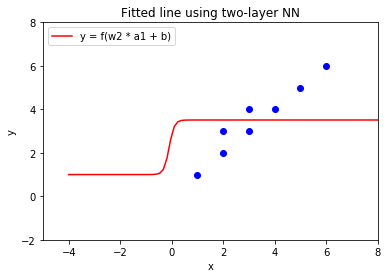

In [18]:
w1, w2, a1, a2, gradient_1, gradient_2 = linear_activation_NN(C=1, lr=0.1, w1=10, w2=10, maxiteration=100)

# plot the fit
x = np.linspace(-4, 10, 100)
y = w2 * (1 / (1 + np.exp(-(w1 * x + 1)))) + 1
# plt.close('all')
plt.plot(x, y, c='red', label='y = f(w2 * a1 + b)')
plt.title('Fitted line using two-layer NN')
plt.legend(loc='upper left')
plt.scatter(x=ar[1], y=ar[2], c='blue')
plt.xlim((-5, 8))
plt.ylim((-2, 8))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Q7 Discussion

The detailed comments for Q1, Q2, Q3, Q5 and Q6 have been made in each section respectively. Here the convergence issue in Q4 and Q6 (the Single-layer NN) will be discussed. 

### Discussion of Convergence Issue

As mentioned in Q4, throughout the first 2 iterations, the updated fit $a$ more and more far away from the actual value. From the code after running 30 iterations, the loss function value becomes larger and larger and won't be able to converge. This is because of the learning rate=0.1 was set to be too large and cause the result to be oscillating and won't be able to converge. In below, the learning rate has been adjusted to 0.001 and the algorithm converged after 23 iterations with loss function value=`14.423`.

The fit has been plotted against the sample data points. 

Iteration= 0 , Loss value= 114465.5
Iteration= 1 , Loss value= 44127.76263888889
Iteration= 2 , Loss value= 17017.205223020348
Iteration= 3 , Loss value= 6567.873882921439
Iteration= 4 , Loss value= 2540.34601692255
Iteration= 5 , Loss value= 987.9997295433596
Iteration= 6 , Loss value= 389.672647492919
Iteration= 7 , Loss value= 159.05703032969262
Iteration= 8 , Loss value= 70.16992413801223
Iteration= 9 , Loss value= 35.90980878104183
Iteration= 10 , Loss value= 22.70479452687343
Iteration= 11 , Loss value= 17.61513269602634
Iteration= 12 , Loss value= 15.653403836536127
Iteration= 13 , Loss value= 14.897286780814902
Iteration= 14 , Loss value= 14.605853538556802
Iteration= 15 , Loss value= 14.493525250164922
Iteration= 16 , Loss value= 14.450230105536656
Iteration= 17 , Loss value= 14.433542683559361
Iteration= 18 , Loss value= 14.427110783293427
Iteration= 19 , Loss value= 14.424631710067663
Iteration= 20 , Loss value= 14.423676190889097
Iteration= 21 , Loss value= 14.4233079012834

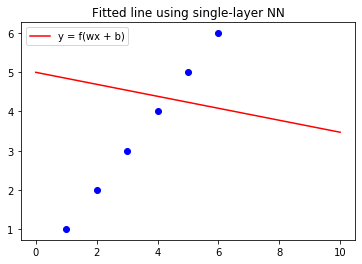

In [19]:
ar = np.array([[1, 1, 1, 1, 1, 1],  # intercept
               [1, 2, 3, 4, 5, 6],  # x
               [1, 2, 3, 4, 5, 6]])  # y
# Data preprocessing
X_lp = ar[[0, 1], :].T  # transpose the array before modeling
y_lp = ar[2].T

# Learning rate has been adjusted to 0.001
w, a, gradient = single_layer_NN(lr=0.001, w=10, maxiteration=100)

# plot the fit
x = np.linspace(0, 10, 100)
y = 5 * w * x + 5
plt.close('all')
plt.plot(x, y, c='red', label='y = f(wx + b)')
plt.title('Fitted line using single-layer NN')
plt.legend(loc='upper left')
plt.scatter(x=ar[1], y=ar[2], c='blue')
plt.show()

The same experiment has been conducted to the convergence issue in Q6 (single-layer NN). As mentioned in Q6, throughout the first 2 iterations, the updated fit $a$ more and more far away from the actual value. From the code after running 30 iterations, the loss function value becomes larger and larger and won't be able to converge. This is because of the learning rate=0.1 was set to be too large and cause the result to be oscillating and won't be able to converge. In below, the learning rate has been adjusted to 0.001 and the algorithm converged after 26 iterations with loss function value=`15.880`.

The fit has been plotted against the sample data points. 

Iteration= 0 , Loss value= 131068.0
Iteration= 1 , Loss value= 59726.50207031248
Iteration= 2 , Loss value= 27221.532076098625
Iteration= 3 , Loss value= 12411.455122484942
Iteration= 4 , Loss value= 5663.613810494699
Iteration= 5 , Loss value= 2589.1286127191474
Iteration= 6 , Loss value= 1188.3162944826613
Iteration= 7 , Loss value= 550.0711819861626
Iteration= 8 , Loss value= 259.27075260494536
Iteration= 9 , Loss value= 126.77480696812822
Iteration= 10 , Loss value= 66.40634173735343
Iteration= 11 , Loss value= 38.900959766581664
Iteration= 12 , Loss value= 26.36882010614876
Iteration= 13 , Loss value= 20.658863973364035
Iteration= 14 , Loss value= 18.05726521036399
Iteration= 15 , Loss value= 16.87191177397209
Iteration= 16 , Loss value= 16.331835114516036
Iteration= 17 , Loss value= 16.085762686551366
Iteration= 18 , Loss value= 15.973645936559972
Iteration= 19 , Loss value= 15.922562742345136
Iteration= 20 , Loss value= 15.899287961980999
Iteration= 21 , Loss value= 15.888683390

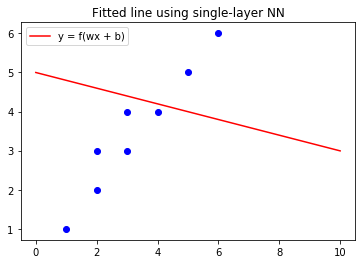

In [20]:
ar = np.array([[1, 1, 1, 1, 1, 1, 1, 1],  # intercept
               [1, 2, 3, 4, 5, 6, 2, 3],  # x
               [1, 2, 3, 4, 5, 6, 3, 4]])  # y
# Data preprocessing
X_lp = ar[[0, 1], :].T  # transpose the array before modeling
y_lp = ar[2].T

# Learning rate has been adjusted to 0.001
w, a, gradient = single_layer_NN(lr=0.001, w=10, maxiteration=100)

# plot the fit
x = np.linspace(0, 10, 100)
y = 5 * w * x + 5
plt.close('all')
plt.plot(x, y, c='red', label='y = f(wx + b)')
plt.title('Fitted line using single-layer NN')
plt.legend(loc='upper left')
plt.scatter(x=ar[1], y=ar[2], c='blue')
plt.show()

## Q8 Bonus Question

I attempt to add two points aiming at balancing out the effect of the two additional points added in Q6. The (2,1) and (3,2) have been added. 

**All four models (Simple Linear Regression, Fuzzy Linear Regression, Support Vector Regression and Single-layer NN) all lead to the same fitted line and they give the same predictions for x = 1, 2, 3, 4, 5, and 6. The prediction results are y = 1, 2, 3, 4, 5, and 6 respectively.**

The training observations look like the graph below. 

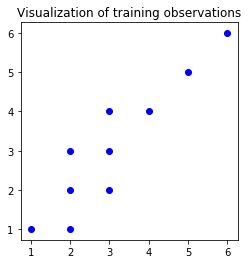

In [21]:
ar = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],  # intercept
               [1, 2, 3, 4, 5, 6, 2, 3, 2, 3],  # x
               [1, 2, 3, 4, 5, 6, 3, 4, 1, 2]])  # y
# plot the dot points
plt.scatter(x=ar[1], y=ar[2], c='blue')
plt.title('Visualization of training observations')
plt.axis('scaled')
plt.show()
X_lp = ar[[0, 1], :].T  # transpose the array before modeling
y_lp = ar[2].T

### Simple Linear Regression

For Simple Linear Regression, the same model in Q1 is used. The estimated a is 1 and b is 0:


The optimal value of loss is: 4.000000000000197

The estimated of a (slope) is: 0.9999999992746318 
The estimate of b (intercept) is: 2.732524248538759e-09


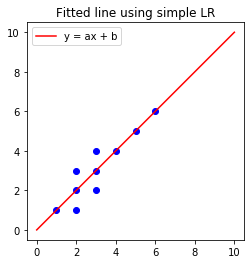

In [22]:
# Define and solve the CVXPY problem.
beta = cp.Variable(X_lp.shape[1])  # return num of cols, 2 in total
cost = cp.sum_squares(X_lp * beta - y_lp)  # define cost function
obj = cp.Minimize(cost)  # define objective function
prob = cp.Problem(obj)
prob.solve(solver=cp.CPLEX, verbose=False)
# print("status:", prob.status)
print("\nThe optimal value of loss is:", prob.value)
print("\nThe estimated of a (slope) is:", beta.value[1],
      "\nThe estimate of b (intercept) is:", beta.value[0])
# Plot the fit
x = np.linspace(0, 10, 100)
y = beta.value[1] * x + beta.value[0]
plt.close('all')
plt.plot(x, y, c='red', label='y = ax + b')
plt.title('Fitted line using simple LR')
plt.legend(loc='upper left')
plt.scatter(x=ar[1], y=ar[2], c='blue')
plt.axis('scaled')
plt.show()

### Fuzzy Linear Regression

For Fuzzy Linear Regression, the same model has been used from Q6. The estimated $A0=0$ with spread=2 and $A1=1$ with spread=0.


The optimal value of loss is: 20.0

The center of A1 (slope) is: 1.0 
The spread of A1 (slope) is: 0.0 
The center of A0 (intercept) is: 0.0 
The spread of A0 (intercept) is: 2.0


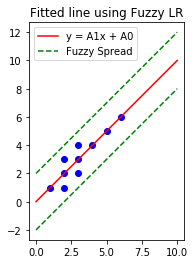

In [25]:
# Define threshold h (it has same meaning as the alpha in alpha-cut). Higher the h, wider the spread.
h = 0.5
# Define and solve the CVXPY problem.
c = cp.Variable(X_lp.shape[1])  # for spread variables, A0 and A1
alpha = cp.Variable(X_lp.shape[1])  # for center/core variables, A0 and A1
cost = cp.sum(X_lp * c)  # define cost function
obj = cp.Minimize(cost)  # define objective function
constraints = [c >= 0,
               y_lp <= (1 - h) * abs(X_lp) * c + X_lp * alpha,  # abs operate on each elements of X_lp
               -y_lp <= (1 - h) * abs(X_lp) * c - X_lp * alpha]

prob = cp.Problem(obj, constraints)
prob.solve(solver=cp.CPLEX, verbose=False)
# print("status:", prob.status)
print("\nThe optimal value of loss is:", prob.value)
print("\nThe center of A1 (slope) is:", alpha.value[1],
      "\nThe spread of A1 (slope) is:", c.value[1],
      "\nThe center of A0 (intercept) is:", alpha.value[0],
      "\nThe spread of A0 (intercept) is:", c.value[0])

# Plot the FR fit
x = np.linspace(0, 10, 100)
y = alpha.value[1] * x + alpha.value[0]
plt.close('all')
plt.plot(x, y, c='red', label='y = A1x + A0')
y = (alpha.value[1] + c.value[1]) * x + alpha.value[0] + c.value[0]
plt.plot(x, y, '--g', label='Fuzzy Spread')
y = (alpha.value[1] - c.value[1]) * x + alpha.value[0] - c.value[0]
plt.plot(x, y, '--g')
plt.title('Fitted line using Fuzzy LR')
plt.legend(loc='upper left')
plt.scatter(x=ar[1], y=ar[2], c='blue')
plt.axis('scaled')
plt.show()

### Support Vector Regression

For Support Vector Regression, the same model has been used from Q6 with $\epsilon$ been set to 1. The estimated $w$ is 1 and $b$ is 0. 


SVR result:
The estimate of w is: 1.0 
The estimate of b is: -0.0


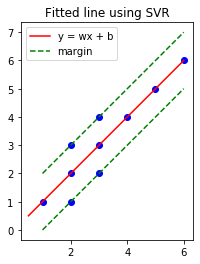

In [26]:
epsilon = 1
bw = cp.Variable(X_lp.shape[1])  # for b and w parameters in SVR. bw[0]=b, bw[1]=w
cost = 1 / 2 * bw[1] ** 2
obj = cp.Minimize(cost)
constraints = [
    y_lp <= X_lp * bw + epsilon,
    -y_lp <= -(X_lp * bw) + epsilon]
prob = cp.Problem(obj, constraints)
prob.solve(solver=cp.CPLEX, verbose=False)
# print("status:", prob.status)
print("\nSVR result:")
print("The estimate of w is:", bw.value[1],
      "\nThe estimate of b is:", bw.value[0], )

# Plot the SVR fit
upper = X_lp[:, 1] * bw.value[1] + bw.value[0] + epsilon  # upper bound of the margin
lower = X_lp[:, 1] * bw.value[1] + bw.value[0] - epsilon  # lower bound of the margin

x = np.linspace(.5, 6, 100)
y = bw.value[1] * x + bw.value[0]
plt.plot(x, y, c='red', label='y = wx + b')
x = [[min(X_lp[:, 1]), max(X_lp[:, 1])]]
y = [[min(lower), max(lower)]]
for i in range(len(x)):
    plt.plot(x[i], y[i], '--g')
y = [[min(upper), max(upper)]]
for i in range(len(x)):
    plt.plot(x[i], y[i], '--g', label='margin')
plt.title('Fitted line using SVR')
plt.legend(loc='upper left')
plt.scatter(x=ar[1], y=ar[2], c='blue')
plt.axis('scaled')
plt.show()

### Single-layer NN

For single-layer NN, I use the same structure in Q4 ***with the bias set to 0***. As discussed in Q7, I set the learning rate=0.001 and the algorithm converge at iteration 30. The estimated $w$ is 0.2. The fitted line with the training sample points are plotted.

Iteration= 0 , Loss value= 140460.5
Iteration= 1 , Loss value= 70309.380040625
Iteration= 2 , Loss value= 35194.79850046009
Iteration= 3 , Loss value= 17617.975244395926
Iteration= 4 , Loss value= 8819.78650842766
Iteration= 5 , Loss value= 4415.798147959143
Iteration= 6 , Loss value= 2211.3542491993735
Iteration= 7 , Loss value= 1107.9060779008041
Iteration= 8 , Loss value= 555.5681992062342
Iteration= 9 , Loss value= 279.0920219139255
Iteration= 10 , Loss value= 140.70014339415238
Iteration= 11 , Loss value= 71.42722365183917
Iteration= 12 , Loss value= 36.75223071907594
Iteration= 13 , Loss value= 19.39544628787546
Iteration= 14 , Loss value= 10.707399360935359
Iteration= 15 , Loss value= 6.358543171362202
Iteration= 16 , Loss value= 4.181696025320171
Iteration= 17 , Loss value= 3.092061581074171
Iteration= 18 , Loss value= 2.546638249791558
Iteration= 19 , Loss value= 2.273623192422225
Iteration= 20 , Loss value= 2.136963799111898
Iteration= 21 , Loss value= 2.0685580856692054
Iter

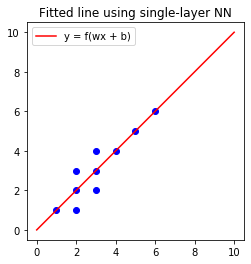

In [26]:
def single_layer_NN(lr, w, maxiteration, bias=1):
    """lr - learning rate\n
    w - initial value of w\n
    maxiteration - define # of max iteration\n
    bias - default is 1 """
    E0 = sum(0.5 * np.power((y_lp - 5 * (w * X_lp[:, 1] + bias)), 2))  # initialize Loss, before 1st iteration
    for i in range(maxiteration):
        if i > 0:  # Starting 2nd iteration, E1 value give to E0
            E0 = E1  # Loss before iteration
        print("Iteration=", i, ",", "Loss value=", E0)
        gradient = np.mean((5 * (w * X_lp[:, 1] + bias) - y_lp) * 5 * X_lp[:, 1])  # calculate gradient
        step = gradient * lr  # calculate step size
        w = w - step  # refresh the weight
        E1 = sum(0.5 * np.power((5 * (w * X_lp[:, 1] + bias) - y_lp), 2))  # Loss after iteration
        a = 5 * (w * X_lp[:, 1] + 1)  # the refreshed output

        if abs(E0 - E1) <= 0.0001:
            print('Break out of the loop and end at Iteration=', i,
                  '\nThe value of loss is:', E1,
                  '\nThe value of w is:', w)
            break
    return w, a, gradient

w, a, gradient = single_layer_NN(lr=0.001, w=10, maxiteration=40, bias=0)

# plot the NN fit
x = np.linspace(0, 10, 100)
y = 5 * w * x + 0
plt.close('all')
plt.plot(x, y, c='red', label='y = f(wx + b)')
plt.title('Fitted line using single-layer NN')
plt.legend(loc='upper left')
plt.scatter(x=ar[1], y=ar[2], c='blue')
plt.axis('scaled')
plt.show()